In [9]:
!pip install stability-sdk -q

In [10]:
!pip install python-libmagic

  Created wheel for python-libmagic: filename=python_libmagic-0.4.0-py3-none-any.whl size=4131 sha256=3e01a5fc8dbb05ada53f70ee94cddb92a978c53701dfbb8fc421ef026772769b
  Stored in directory: c:\users\ruofan mo\appdata\local\pip\cache\wheels\7a\8e\10\1c593344fcbb4f5172e154bca2d834b6bcc4a0c8d758dab68d
  Running setup.py clean for cffi
Successfully built python-libmagic
Failed to build cffi
  Attempting uninstall: cffi
    Found existing installation: cffi 1.15.0
    Uninstalling cffi-1.15.0:
      Successfully uninstalled cffi-1.15.0
    Running setup.py install for cffi: started
    Running setup.py install for cffi: finished with status 'error'
  Rolling back uninstall of cffi
  Moving to c:\users\ruofan mo\anaconda3\lib\site-packages\_cffi_backend.cp39-win_amd64.pyd
   from C:\Users\Ruofan Mo\AppData\Local\Temp\pip-uninstall-voc55_qy\_cffi_backend.cp39-win_amd64.pyd
  Moving to c:\users\ruofan mo\anaconda3\lib\site-packages\cffi-1.15.0.dist-info\
   from C:\Users\Ruofan Mo\anaconda3\Li

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Ruofan Mo\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Ruofan Mo\\AppData\\Local\\Temp\\pip-install-oqihs1f4\\cffi_5e62fbddef004d61bce9045004f7c6b8\\setup.py'"'"'; __file__='"'"'C:\\Users\\Ruofan Mo\\AppData\\Local\\Temp\\pip-install-oqihs1f4\\cffi_5e62fbddef004d61bce9045004f7c6b8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Ruofan Mo\AppData\Local\Temp\pip-wheel-8saxzv8h'
       cwd: C:\Users\Ruofan Mo\AppData\Local\Temp\pip-install-oqihs1f4\cffi_5e62fbddef004d61bce9045004f7c6b8\
  Complete output (26 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd6

In [5]:
import getpass, os

In [12]:
os.environ['STABILITY_KEY'] = getpass.getpass('sk-bE6qIsAnd0bI4YCDxeAh9iGwFXJeA8eGfKJ0jCL2EZfbJ8w0')

sk-bE6qIsAnd0bI4YCDxeAh9iGwFXJeA8eGfKJ0jCL2EZfbJ8w0········


In [13]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)

In [16]:
inp_prompt = "colorful rain"

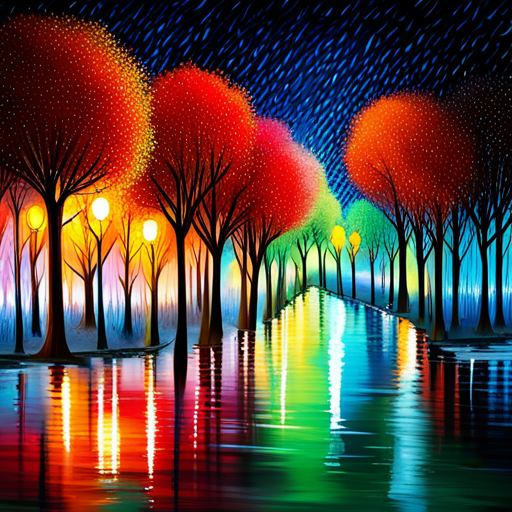

In [17]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt=inp_prompt,
    seed=34567, # if provided, specifying a random seed makes results deterministic
    steps=20, # defaults to 30 if not specified
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

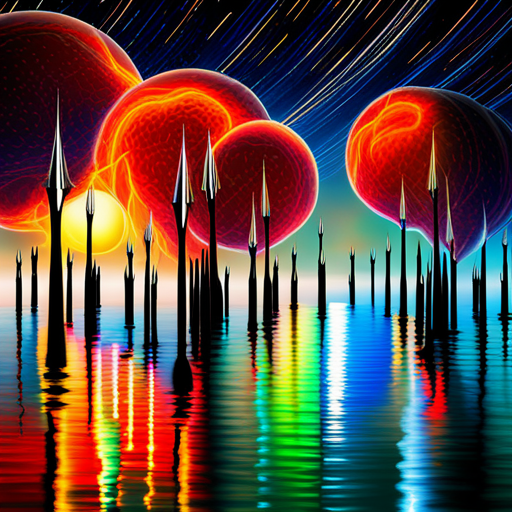

In [19]:
answers = stability_api.generate(
    prompt="sky rocket launch digital art",
    init_image=img,
    seed=54321, # if we're passing in an image generated by SD, you may get better results by providing a different seed value than was used to generate the image
    start_schedule=0.6, # this controls the "strength" of the prompt relative to the init image
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)